# Section IV - MNIST

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, manifold
from sklearn.utils import shuffle


import helpers as HL
import plot_functions as PL
import pickle_functions as PK

%load_ext autoreload
%autoreload 2

#constants
folder="mnist_pickles"
nb_samples = 1000
grid_width = 24

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### ///////////////// TODO /////////////////////

- fix heatmap x-axis labels to scientific notation with few decimals
- copy/paste discussion from report and modify

###### //////// B-list ////////
- fix image to be inside frame

## A. The dataset

### Description
The MNIST-dataset is 



In [10]:
# Loading dataset
inputs, targets = HL.import_mnist()

# some constanst
n_samples, n_features = inputs.shape
n_neighbors = 30
pixel_width = int(np.sqrt(inputs.shape[1]))
print("pixel_width of each image: ", pixel_width)


inputs shape:  (70000, 784)
targets shape:  (70000,)
pixel_width of each image:  28


### Insight in the dataset

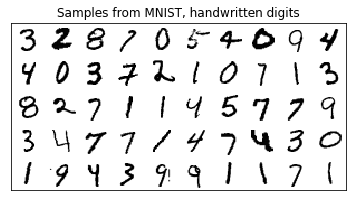

In [23]:
PL.plot_digits_samples(inputs, row_dim=5, col_dim=10)

As you can see this is the dataset input is a picture with 8x8 pixels. low resolution

Next we will look as some local variation in the data within the same classes/digits

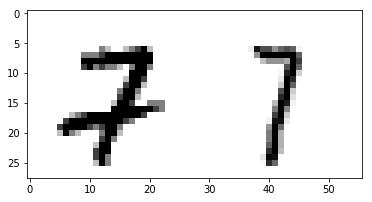

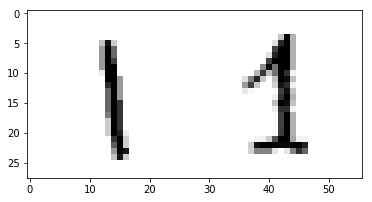

In [28]:
# show differences in 7's
X_7 = HL.get_X_with_label(inputs, targets, 7)
plt.imshow(np.hstack((X_7[1].reshape((pixel_width,pixel_width)), X_7[2].reshape((pixel_width,pixel_width)))), cmap=plt.cm.binary)
plt.show()
# show differences in 1's
X_1 = HL.get_X_with_label(inputs, targets, 1)
plt.imshow(np.hstack((X_1[1].reshape((pixel_width,pixel_width)), X_1[316].reshape((pixel_width,pixel_width)))), cmap=plt.cm.binary)
plt.show()

Here we can see some of the variations one could expect from handwritten digits. There are different types of writing. The seven can be written with or without a crossbar at the top image. Some ones are written with a bottom crossbar like the one to right some are not. These are just one of the variations we can occur in the 

## B. LLE

In [30]:
nb_components = 2
nb_neighbors = 12

lle = manifold.LocallyLinearEmbedding(nb_neighbors, nb_components, reg=1000,
                                      method='standard')
X_lle = lle.fit_transform(inputs[0:nb_samples])

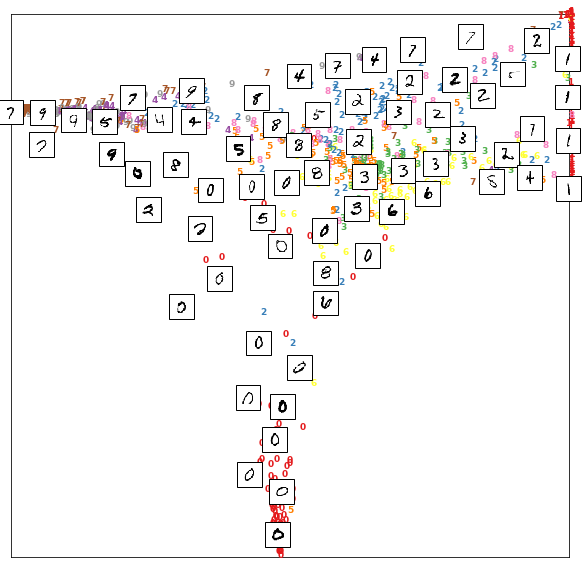

In [31]:

PL.plot_embedding(inputs, X_lle, targets[0:nb_samples])
plt.savefig("MNIST_lle_embedding")
plt.show()

We can see it discover some of the underlying structure in how we are writing the digits, but it is rather bad at finding the semantic value up the semantic

### Finding optimal parameters
- heatmap with nb_neighbors and regr.value with accuracy in each point


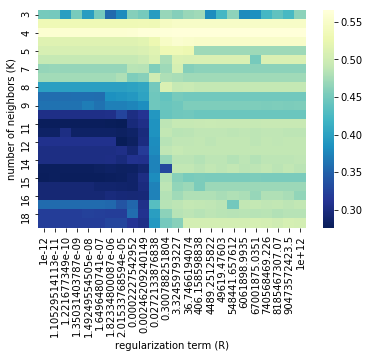

In [8]:
lle_dict = PK.kmeans_clustering_accuracy(inputs, targets, "lle", grid_width=grid_width, nb_samples=nb_samples,
                                      reg_range=(-12, 12), neighbor_range=(3,35), plot=True, create=True)

## C. t-sne

In [33]:
#nb_samples = 3000
tsne = manifold.TSNE(n_components=2, perplexity=15.0, min_grad_norm=0.1,
                     init='pca', random_state=123)
X_tsne = tsne.fit_transform(inputs[0:nb_samples])


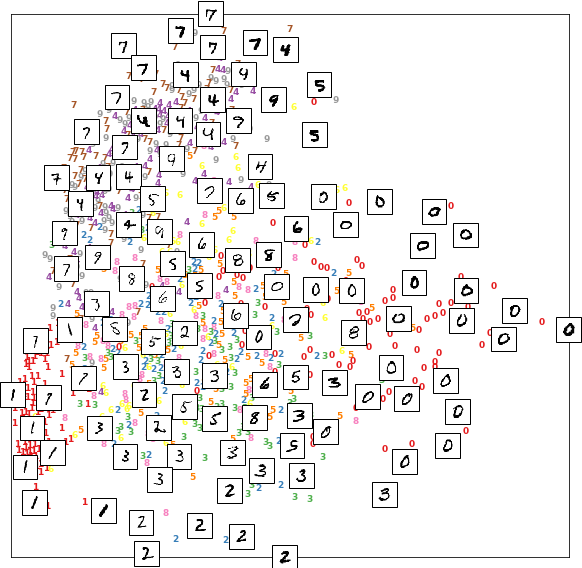

In [34]:

PL.plot_embedding(inputs, X_tsne, targets[0:nb_samples])
plt.savefig("MNIST_tsne_embedding")
plt.show()

### Finding optimal parameters
- heatmap with nb_neighbors and regr.value with accuracy in each point


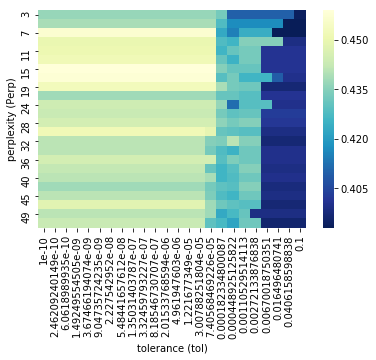

In [11]:
tsne_dict = PK.kmeans_clustering_accuracy(inputs, targets, "tsne", grid_width=grid_width, nb_samples=nb_samples,
                                          min_grad_norm_range=(-8,-1), perplexity_range=(3,100), plot=True, create=True)


## D. Comparison